In [1]:
from fastcore.xtras import load_pickle
import pandas as pd 
import os 
from glob import glob
from pathlib import Path
from scipy.stats import sem
import matplotlib.pyplot as plt
import pycm 

FOLDER = 'out'

In [2]:
if not os.path.exists(FOLDER):
    raise FileExistsError('Cannot find folder {}'.format(FOLDER))

all_res = glob(f'{FOLDER}/*.pkl')
print('Pickles found in {}: {}'.format(FOLDER, len(all_res)))

Pickles found in out: 108


In [3]:
compiled_res_list = []
conf_mats = []

for results in all_res:
    res_full = load_pickle(results)
    res = res_full['results']
    print(res_full)
    summary = {
        'size': res_full['train_size'],
        #'test_size': len(res_full['predictions']),
        'representation': res_full['data_summary']['representation'],
        'target': res_full['data_summary']['target'],
        'accuracy': res['accuracy'],
        'f1_macro': res['f1_macro'],
        'f1_micro': res['f1_micro'],
        'kappa': res['kappa'],
        'num_epochs': res_full['config']['tune_settings']['num_train_epochs'],
        'lr': res_full['config']['tune_settings']['learning_rate'],
        'bins': len(set(res['all_y_true']))
       
    }
    confusion_matrix = {
        'all_y_true':res['all_y_true'],
        'all_y_pred':res['all_y_pred']
    }
    conf_mats.append(confusion_matrix)
    compiled_res_list.append(summary)

{'results': {'accuracy': 0.82, 'acc_macro': 0.82, 'racc': 0.6200000000000001, 'kappa': 0.526315789473684, 'confusion_matrix': pycm.ConfusionMatrix(classes: [0, 1]), 'f1_macro': 0.76, 'f1_micro': 0.82, 'frac_valid': 1.0, 'all_y_true': [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1], 'all_y_pred': array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0]), 'valid_indices': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], 'might_have_rounded_floats': False}, 'predictions': array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0

In [4]:
compiled_res = pd.DataFrame(compiled_res_list)
grouped_res =compiled_res.groupby(['target','bins', 'num_epochs', 'representation', 'size']).agg(['mean', 'sem'])


In [5]:
grouped_res


accuracy            f1_macro  \
                                                  mean       sem      mean   
target   bins num_epochs representation size                                 
HER_bool 2    8          mofid          10    0.653333  0.006667  0.351781   
                                        25    0.840000  0.061101  0.827152   
                                        50    0.888889  0.015873  0.864960   
                                        75    0.941176  0.000000  0.932806   
              16         mofid          10    0.926667  0.029059  0.911113   
                                        25    0.900000  0.011547  0.885125   
                                        50    0.896825  0.007937  0.876650   
                                        75    0.980392  0.019608  0.977602   
              25         mofid          10    0.946667  0.033333  0.935321   
                                        25    0.920000  0.023094  0.906167   
                                        50    0.888889  0.015873  0.864960   
                                        75    0.980392  0.019608  0.977602   
OER_bool 2    8          mofid          10    0.526667  0.123468  0.499820   
                                        25    0.733333  0.100885  0.718352   
                                        50    0.833333  0.023810  0.799339   
                                        75    0.921569  0.019608  0.909488   
              16         mofid          10    0.833333  0.024037  0.761009   
                                        25    0.840000  0.030551  0.799540   
                                        50    0.865079  0.028615  0.831302   
                                        75    0.882353  0.033962  0.864692   
              25         mofid          10    0.800000  0.011547  0.738977   
                                        25    0.866667  0.024037  0.833422   
                                        50    0.865079  0.028615  0.832448   
                                        75    0.823529  0.033962  0.780903   
VIS_bool 2    8          mofid          10    0.640000  0.000000  0.390244   
                                        25    0.900000  0.040000  0.893572   
                                        50    0.928571  0.013746  0.920018   
                                        75    0.941176  0.033962  0.936314   
              16         mofid          10    0.893333  0.013333  0.883303   
                                        25    0.926667  0.006667  0.920793   
                                        50    0.936508  0.007937  0.930821   
                                        75    0.921569  0.019608  0.915557   
              25         mofid          10    0.900000  0.020000  0.888464   
                                        25    0.906667  0.024037  0.808765   
                                        50    0.928571  0.000000  0.923149   
                                        75    0.921569  0.019608  0.915557   

                                                        f1_micro            \
                                                   sem      mean       sem   
target   bins num_epochs representation size                                 
HER_bool 2    8          mofid          10    0.045809  0.653333  0.006667   
                                        25    0.055529  0.840000  0.061101   
                                        50    0.025135  0.888889  0.015873   
                                        75    0.000000  0.941176  0.000000   
              16         mofid          10    0.036568  0.926667  0.029059   
                                        25    0.016764  0.900000  0.011547   
                                        50    0.013686  0.896825  0.007937   
                                        75    0.022398  0.980392  0.019608   
              25         mofid          10    0.042065  0.946667  0.033333   
                                        25    0.028719  0.920000  0

/tmp/ipykernel_59474/2898031630.py:40: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(hspace=0.6, top=1, bottom=0.2)


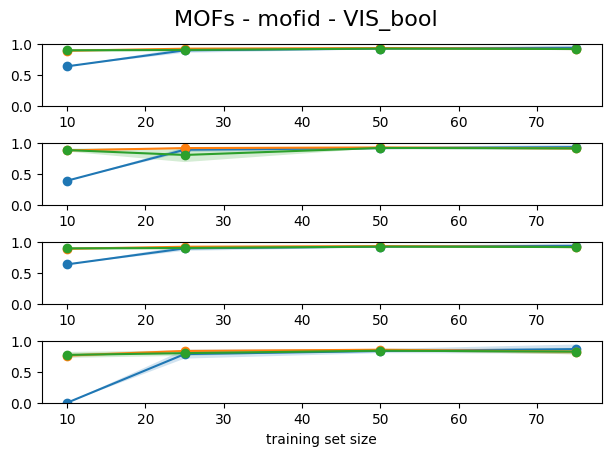

In [8]:
from scipy.stats import sem
from scipy.constants import golden
from datetime import datetime

ONE_COL_WIDTH_INCH = 6
TWO_COL_WIDTH_INCH = 7.2

ONE_COL_GOLDEN_RATIO_HEIGHT_INCH = ONE_COL_WIDTH_INCH / golden
TWO_COL_GOLDEN_RATIO_HEIGHT_INCH = TWO_COL_WIDTH_INCH / golden

BINS = 2
REPRESENTATION = 'mofid'
TARGET = 'VIS_bool'

fig, ax = plt.subplots(4, 1,figsize=(ONE_COL_WIDTH_INCH, TWO_COL_GOLDEN_RATIO_HEIGHT_INCH), constrained_layout = True)
 
for num_epochs in [8, 16 , 25]:
    for i, metric in enumerate(['accuracy', 'f1_macro', 'f1_micro', 'kappa']):
        ax[i].plot(
            grouped_res.loc[TARGET, BINS, num_epochs,REPRESENTATION].index, 
            grouped_res.loc[TARGET, BINS, num_epochs,REPRESENTATION][metric]['mean'],
            marker='o',
            label=f'{num_epochs} epochs'
        )
        ax[i].fill_between(
            grouped_res.loc[TARGET, BINS, num_epochs,REPRESENTATION].index,
            grouped_res.loc[TARGET, BINS, num_epochs,REPRESENTATION][metric]['mean'] - grouped_res.loc[TARGET, BINS, num_epochs,REPRESENTATION][metric]['sem'],
            grouped_res.loc[TARGET,BINS, num_epochs,REPRESENTATION][metric]['mean'] + grouped_res.loc[TARGET, BINS, num_epochs,REPRESENTATION][metric]['sem'],
            alpha=0.2
        )
        ax[i].set_ylim(0,1)
    
    #ylabel_top('accuracy', ax=ax[0])
    #ylabel_top(r'F$_1$ macro', ax=ax[1])
    #ylabel_top(r'F$_1$ micro', ax=ax[2])
    #ylabel_top(r'$\kappa$', ax=ax[3])
ax[-1].set_xlabel('training set size')

#matplotx.line_labels(ax[0])
plt.subplots_adjust(hspace=0.6, top=1, bottom=0.2)

now = datetime.now().strftime('%Y%m%d_%H%M')
fig.suptitle('MOFs - {} - {}'.format(REPRESENTATION, TARGET), fontsize=16)
fig.savefig(f'{now}_MOFs-{REPRESENTATION}-{TARGET}-{BINS}bin-classification-results.pdf', bbox_inches='tight')